In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
ames_clean = pd.read_csv('ames_clean.csv')


In [3]:
ames_clean.describe()

,Unnamed: 0,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,full_bath,year_remod/add,mas_vnr_area,saleprice
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000
mean,1463.878141,6.086403,1498.503614,1.764544,472.341480,1050.524613,1159.108778,1971.133907,1.562823,1984.119105,101.966954,180425.310155
std,847.032561,1.409984,506.307777,0.761267,215.226042,440.657122,391.464186,30.216510,0.551976,20.857882,179.154308,79811.033929
min,0.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,1872.000000,0.000000,1950.000000,0.000000,12789.000000
25%,730.000000,5.000000,1124.000000,1.000000,320.000000,792.000000,876.000000,1953.000000,1.000000,1965.000000,0.000000,129200.000000
50%,1464.000000,6.000000,1440.000000,2.000000,479.000000,990.000000,1084.000000,1973.000000,2.000000,1993.000000,0.000000,160000.000000
75%,2196.000000,7.000000,1740.000000,2.000000,576.000000,1300.000000,1383.000000,2000.000000,2.000000,2004.000000,164.000000,213000.000000
max,2929.000000,10.000000,5642.000000,5.000000,1488.000000,6110.000000,5095.000000,2010.000000,4.000000,2010.000000,1600.000000,755000.000000


In [5]:
y = ames_clean['saleprice']
x = ames_clean.drop(['saleprice'], axis=1)
x

,Unnamed: 0,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,full_bath,year_remod/add,mas_vnr_area
0,0,6,1656,2.0,528.0,1080.0,1656,1960,1,1960,112.0
1,1,5,896,1.0,730.0,882.0,896,1961,1,1961,0.0
2,2,6,1329,1.0,312.0,1329.0,1329,1958,1,1958,108.0
3,3,7,2110,2.0,522.0,2110.0,2110,1968,2,1968,0.0
4,4,5,1629,2.0,482.0,928.0,928,1997,2,1998,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2900,2925,6,1003,2.0,588.0,1003.0,1003,1984,1,1984,0.0
2901,2926,5,902,2.0,484.0,864.0,902,1983,1,1983,0.0
2902,2927,5,970,0.0,0.0,912.0,970,1992,1,1992,0.0
2903,2928,5,1389,2.0,418.0,1389.0,1389,1974,1,1975,0.0


# Train-test split

In [6]:
# split into train and test split
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
X_train

,Unnamed: 0,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,full_bath,year_remod/add,mas_vnr_area
1913,1931,5,1560,2.0,484.0,1560.0,1560,1958,2,1958,260.0
163,164,5,900,2.0,576.0,900.0,900,1951,1,2000,0.0
2762,2786,5,894,2.0,552.0,894.0,894,1972,1,1972,0.0
252,253,7,3222,3.0,594.0,1673.0,1699,1990,3,1990,0.0
1873,1891,6,1042,2.0,440.0,1042.0,1042,1965,2,1965,98.0
...,...,...,...,...,...,...,...,...,...,...,...
1638,1650,6,2030,2.0,551.0,848.0,1118,1976,2,1976,298.0
1095,1101,9,2172,3.0,687.0,1519.0,1533,2000,2,2000,295.0
1130,1139,6,1609,2.0,525.0,754.0,754,1995,2,1995,38.0
1294,1304,4,901,1.0,281.0,901.0,901,1954,1,2000,0.0


# Fit OLS model

In [7]:
# fit the OLS model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8002201657616508

In [8]:
# using model to predict the values of x test
y_pred = reg.predict(X_test)
y_pred

array([131900.78038904, 235116.706552  , 173577.5976765 , 193174.53738836,
       145918.74254969, 203473.63210505, 203358.05893489, 116227.60773338,
       317504.6408005 , 113343.15444189, 169256.1318508 , 280504.50180057,
       128135.57434476, 102747.37131725, 255976.26258653, 103667.31287007,
       121538.48872379, 150284.30797735, 146981.03310966, 203948.78609712,
       174330.2328975 , 145941.23953968, 134717.71921326, 111423.37695818,
       148046.46976977, 109454.58006453, 170861.41380382, 239954.41651014,
       191036.67805898, 188539.45406218,  90662.50799635, 102917.01052195,
       239126.47097189, 228094.46340225, 139908.96040656, 182040.04355015,
       160094.06329168, 194640.82520795, 188693.06309803, 148212.4482787 ,
       161516.10735864, 325891.09248641, 162728.32639948, 104172.60385073,
       110857.92090554,  95894.26242145, 190213.15791763, 304997.74179004,
       290700.00057382, 221497.89466157, 277272.30501101, 166450.9379887 ,
       174531.92668678, 1

# OLS model evaluation 

In [9]:
# model evaluation - MSE | R^2 = ~0.8
sk.metrics.mean_squared_error(y_test, y_pred)

1501017949.7734966

In [10]:
# linear model evaluation - MAE 
sk.metrics.mean_absolute_error(y_test, y_pred)

24505.044615812505

# Gradient Boosting Regression Model 

In [11]:
# Gradient Boosting Model fit the OLS model
GBR = GradientBoostingRegressor().fit(X_train, y_train)
GBR.score(X_train, y_train)

0.9301729954410712

In [12]:
# GBR model fit 
y_pred_gbr = GBR.predict(X_test)
y_pred_gbr

array([138699.21723199, 219239.44902518, 174092.24148138, 175618.37397866,
       143473.14938483, 199321.19718773, 203163.23662421, 115417.4056088 ,
       346046.90367311, 114449.89206355, 146572.96248919, 281542.62229321,
       135272.43140995, 109329.86192428, 329998.08179756, 117114.45176169,
       133621.87802551, 142268.86202916, 146858.57469628, 190474.22841996,
       162483.09302919, 148194.72519283, 133870.75876147, 127407.97315358,
       140680.59780701, 108682.39017913, 147965.94768592, 232244.7760056 ,
       183062.16539908, 171737.6563981 ,  89973.23089824, 120072.51930836,
       222657.53529508, 212706.3419155 , 105269.47662119, 166816.70474001,
       143647.15034936, 201583.23110908, 173369.93456802, 143067.99929352,
       147849.15023992, 382796.22484311, 158862.86791998, 125027.51417932,
       126143.01317307, 112651.15342477, 193293.15716376, 343441.41131246,
       299702.76343299, 201015.48112576, 279879.54123394, 175132.29634567,
       191040.82492922, 1

# GBR model evaluation 

In [13]:
# GBR MSE 
sk.metrics.mean_squared_error(y_test, y_pred_gbr)

876020360.1636698

In [14]:
# GBR MAE 
sk.metrics.mean_absolute_error(y_test, y_pred_gbr)

18847.163883709138

# Histograms of absolute error 

(array([434., 109.,  19.,   9.,   4.,   1.,   0.,   3.,   1.,   1.]),
 array([5.70857361e+00, 2.97984422e+04, 5.95911758e+04, 8.93839095e+04,
        1.19176643e+05, 1.48969377e+05, 1.78762110e+05, 2.08554844e+05,
        2.38347578e+05, 2.68140311e+05, 2.97933045e+05]),
 <BarContainer object of 10 artists>)

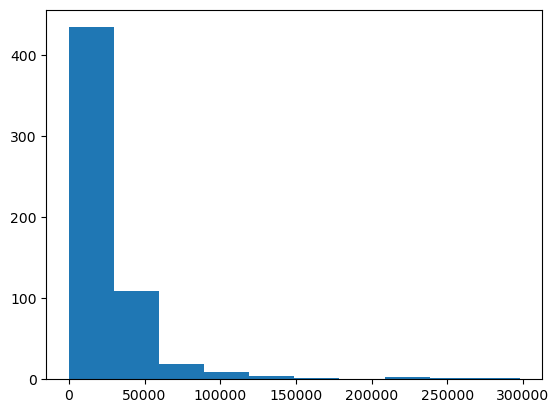

In [15]:
# OLS histogram of absolute error
differences = abs(y_test - y_pred) # abs used to remove negative values
#differences
plt.hist(differences)

(array([437., 102.,  23.,  10.,   2.,   4.,   2.,   0.,   0.,   1.]),
 array([3.44616433e+01, 2.41324547e+04, 4.82304477e+04, 7.23284408e+04,
        9.64264338e+04, 1.20524427e+05, 1.44622420e+05, 1.68720413e+05,
        1.92818406e+05, 2.16916399e+05, 2.41014392e+05]),
 <BarContainer object of 10 artists>)

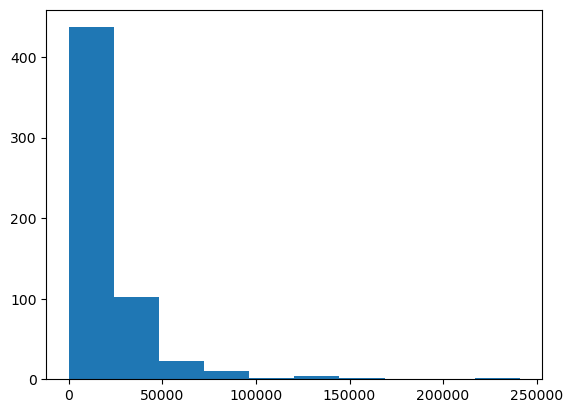

In [16]:
# GBR histogram 
differences_gbr = abs(y_test - y_pred_gbr) # abs used to remove negative values
#differences
plt.hist(differences_gbr)

# Scatterplots of actual price vs absolute difference  

Text(0.5, 1.0, 'Linear Regression Model')

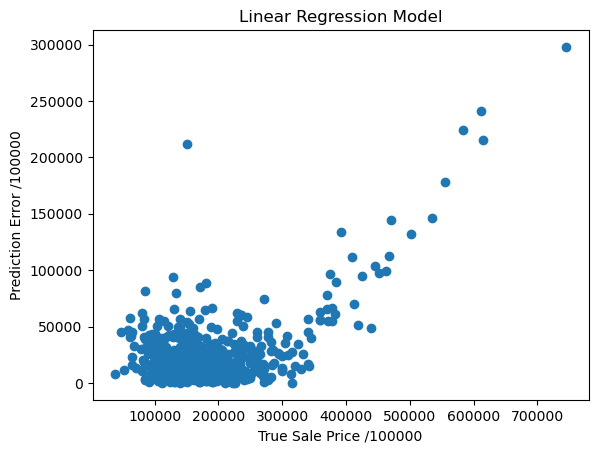

In [19]:
# scatterplot of actual price (x-axis) vs absolute differences (y-axis) for linear regression
plt.scatter(y_test, differences)
plt.xlabel('True Sale Price /100000')
plt.ylabel('Prediction Error /100000')
plt.title('Linear Regression Model')

Text(0.5, 1.0, 'Gradient Booster Regression Model')

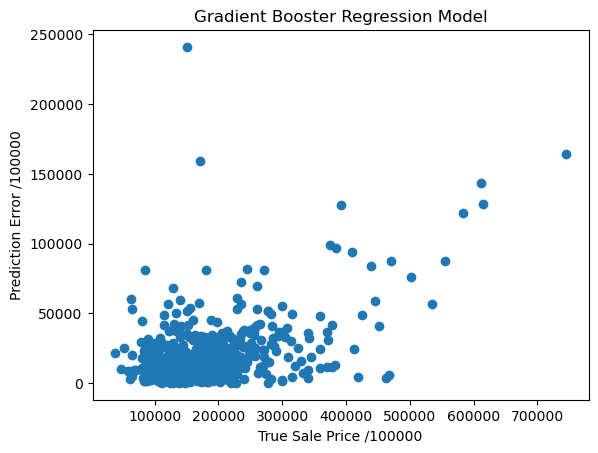

In [20]:
# scatterplot of actual price (x-axis) vs absolute differences (y-axis) for GBR model 
plt.scatter(y_test, differences_gbr)
plt.xlabel('True Sale Price /100000')
plt.ylabel('Prediction Error /100000')
plt.title('Gradient Booster Regression Model')